   # Jayson Tatum
   ### NBA draft: 2017 (Round: 1 / Pick: 3)

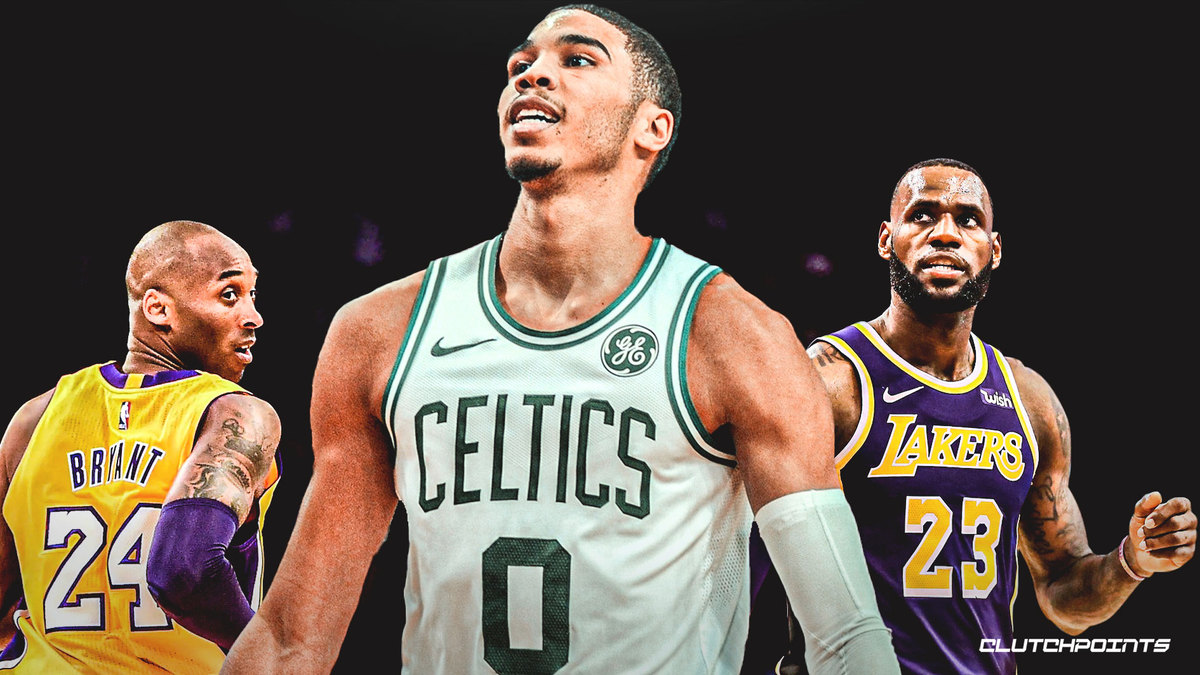

In [106]:
from IPython.display import Image
Image(r"C:\Users\dee\Documents\Python\Tatum/tatum.jpg")

Reference: https://clutchpoints.com/jayson-tatum-makes-history-with-record-lebron-james-kobe-bryant-failed-to-achieve/

## Tatum is celtics player with a huge potential. Some people say that his game is closer to Kobe Bryant with his ability to score these mid range shots. Others argue that his ability to attack the basket efficient, reminds Lebron James style.

### With this notebook I will try to use advanced data from these players to answer the above question. In this equation I will add Michael Jordan's data for any interesting outcomes. In addition, I will create a machine learning model to predict whose career of these legends, Jayson Tatum's will be closer. 
#### Data extracted from "https://www.basketball-reference.com/"

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_tatum = pd.read_csv("per_game_stats_Tatum.csv")
df_tatum.head(6)

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season
1,2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season
2,2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season
3,2017-18,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
4,2018-19,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs
5,2019-20,21,BOS,NBA,PF,17,17,40.6,8.5,19.6,0.434,2.8,7.4,0.373,5.8,12.2,0.471,0.504,5.9,7.2,0.813,1.3,8.7,10.0,5.0,1.0,1.2,2.8,2.4,25.7,Jason Tatum,Playoffs


In [4]:
df_reg=df_tatum[df_tatum["RSorPO"]=='Regular Season']
df_reg

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season
1,2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season
2,2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season


In [5]:
df_playoffs=df_tatum[df_tatum["RSorPO"]=='Playoffs']
df_playoffs

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
3,2017-18,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
4,2018-19,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs
5,2019-20,21,BOS,NBA,PF,17,17,40.6,8.5,19.6,0.434,2.8,7.4,0.373,5.8,12.2,0.471,0.504,5.9,7.2,0.813,1.3,8.7,10.0,5.0,1.0,1.2,2.8,2.4,25.7,Jason Tatum,Playoffs


In [6]:
df_reg.set_index(['Season'],inplace=True)
df_playoffs.set_index(['Season'],inplace=True)

In [7]:
df_tatum.set_index(['Season'],inplace=True)

In [8]:
df_new=pd.concat([df_reg,df_playoffs],axis=1)
df_new.head()

,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs
2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season,21,BOS,NBA,PF,17,17,40.6,8.5,19.6,0.434,2.8,7.4,0.373,5.8,12.2,0.471,0.504,5.9,7.2,0.813,1.3,8.7,10.0,5.0,1.0,1.2,2.8,2.4,25.7,Jason Tatum,Playoffs


### First thing we want to visualize some data from Jayson Tatum's first three seasons

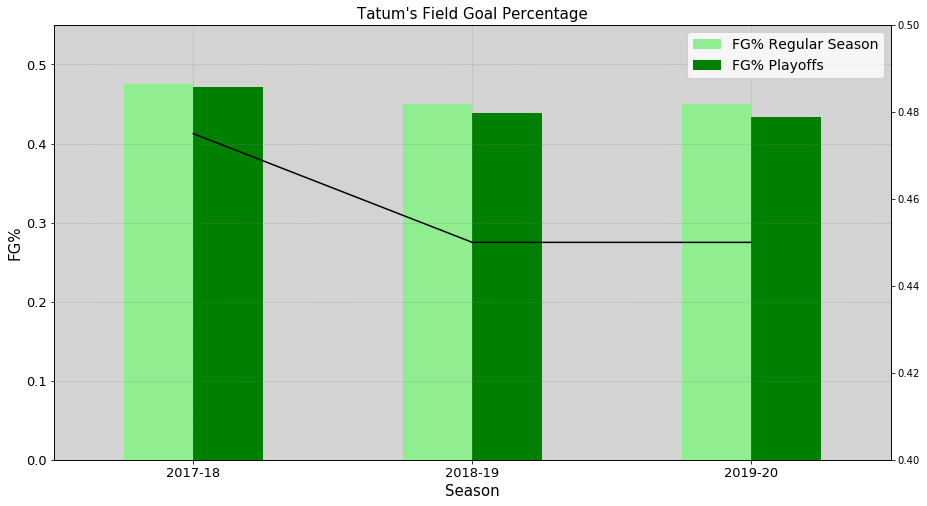

In [16]:
ax=df_new['FG%'].plot(kind='bar',figsize=(15,8),color=['lightgreen','green'],alpha=1)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's Field Goal Percentage",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('FG%',fontsize=15)
ax.legend(['FG% Regular Season','FG% Playoffs'],fontsize=14)
ax.set_ylim(0,0.55)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax1 = ax.twinx()
ax1=df_reg['FG%'].plot(kind='line',color=['black'])
ax1.set_ylim(0.4,0.5)
plt.show()

In [10]:
df_reg['FG%']

Season
2017-18    0.475
2018-19    0.450
2019-20    0.450
Name: FG%, dtype: float64

### We see that his field goal percentage is higher in the first season than the second and third. The drop was low though from 47.5% in the 1st to 45% in the 2nd and 3rd. This is maybe because he wasn't taking too much shoots in the first season as the second and third. Let's find out

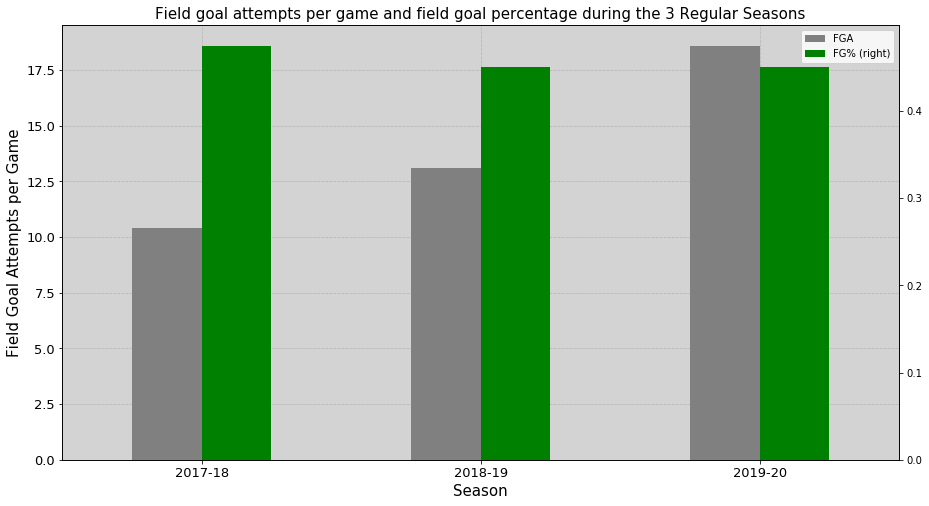

In [17]:
ax2=df_reg[['FGA','FG%']].plot(kind='bar',figsize=(15,8),color=['grey','green'],secondary_y='FG%')
ax2.set_facecolor('lightgrey')
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_title('Field goal attempts per game and field goal percentage during the 3 Regular Seasons',fontsize=15)
ax2.set_ylabel('Field Goal Attempts per Game',fontsize=15)
ax2.set_xlabel('Season',fontsize=15)
ax2.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax2.tick_params(axis='y',which='major',labelsize=13)

### This proof what we assumed. That this small drop in the FG% is becasue he takes more attempts the last two seasons. Significant is that he is realy improved in the third season where he increased the attempts from 13.1 to 18.6 with the same FG%

In [12]:
df_tatum.head()

,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season
2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season
2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season
2017-18,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
2018-19,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs


In [13]:
df_new.head()

,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs
2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season,21,BOS,NBA,PF,17,17,40.6,8.5,19.6,0.434,2.8,7.4,0.373,5.8,12.2,0.471,0.504,5.9,7.2,0.813,1.3,8.7,10.0,5.0,1.0,1.2,2.8,2.4,25.7,Jason Tatum,Playoffs


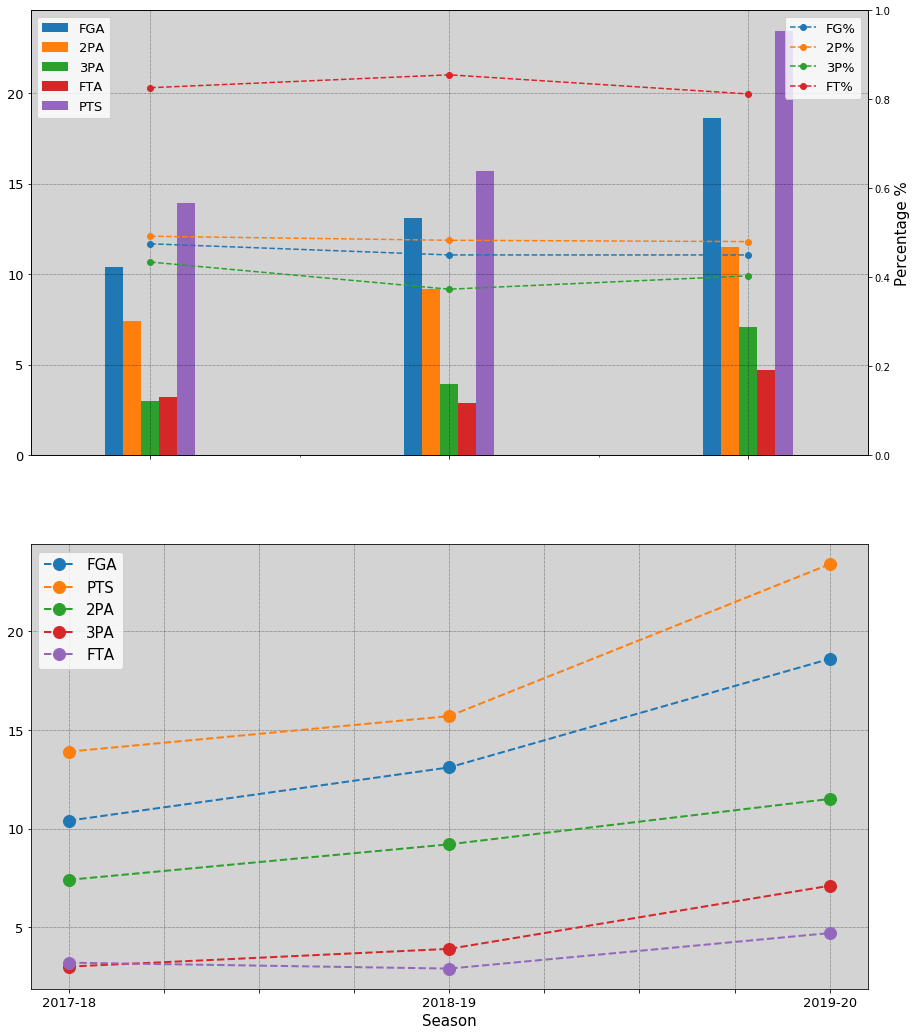

In [159]:
df_reg_new=df_reg[['FGA','FG%','3PA','3P%','2PA','2P%','FTA','FT%','TRB','AST','STL','BLK','TOV','PTS']]

fig=plt.figure(figsize=(15,18))

ax=fig.add_subplot(2,1,1)
ax=df_reg_new[['FGA','2PA','3PA','FTA','PTS']].plot(kind='bar',width=0.3,align='center',ax=ax)
#ax3=df_reg_new[['2PA','3PA']].plot(kind='bar',stacked=True,width=0.1,align='center',ax=ax,alpha=0.2,color=['grey','lightgrey'])
ax.legend(loc='upper left',fontsize=13)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Season',fontsize=13)
ax.set_ylabel('')
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.grid(color='black', linestyle='dotted', linewidth=0.5)
ax2=ax.twinx()
ax2=df_reg_new[['FG%','2P%','3P%','FT%']].plot(kind='line',style='o--',ax=ax2)
ax2.set_ylim(0,1)
ax2.set_ylabel('Percentage %',fontsize=15)
ax2.tick_params(axis='y',which='major',labelsize=10)
ax2.set_xlabel('Season',fontsize=13)
ax2.legend(loc='upper right',fontsize=13)

ax1=fig.add_subplot(2,1,2)
ax1=df_reg_new[['FGA','PTS','2PA','3PA','FTA']].plot(kind='line',style='o--',linewidth=2,ms=12,ax=ax1)
ax1.set_facecolor('lightgrey')
ax1.legend(fontsize=15)
ax1.set_xlabel('Season',fontsize=15)
ax1.tick_params(axis='both',which='major',labelsize=13)
ax1.grid(color='black', linestyle='dotted', linewidth=0.5)


In [179]:
df_shoot=pd.read_csv("Shooting stats_tatum.csv")
df_shoot.head()

,Season,Age,Tm,Lg,Pos,G,MP,FG%,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,Player,REorPL
0,2017-18,19,BOS,NBA,SF,80,2438,0.475,12.7,0.710,0.320,0.107,0.096,0.188,0.290,0.492,0.629,0.258,0.438,0.420,0.434,0.565,0.924,0.071,51,0.227,0.564,0,0,Jason Tatum,Regular Season
1,2018-19,20,BOS,NBA,SF,79,2455,0.450,13.6,0.700,0.261,0.133,0.137,0.169,0.300,0.483,0.678,0.326,0.430,0.349,0.373,0.497,0.853,0.070,68,0.273,0.341,0,0,Jason Tatum,Regular Season
2,2019-20,21,BOS,NBA,PF,66,2265,0.450,14.4,0.617,0.248,0.155,0.126,0.089,0.383,0.480,0.618,0.374,0.396,0.394,0.403,0.433,0.545,0.050,56,0.171,0.413,3,0,Jason Tatum,Regular Season
3,2017-18,19,BOS,NBA,SF,19,683,0.471,11.9,0.728,0.372,0.096,0.107,0.153,0.272,0.526,0.639,0.280,0.464,0.450,0.324,0.510,0.565,0.069,16,0.197,0.286,0,0,Jason Tatum,Playoffs
4,2018-19,20,BOS,NBA,SF,9,295,0.438,13.1,0.723,0.286,0.134,0.125,0.179,0.277,0.481,0.594,0.267,0.286,0.600,0.323,0.590,1.000,0.089,10,0.226,0.286,0,0,Jason Tatum,Playoffs


In [180]:
df_shoot.set_index(['Season'],inplace=True)
df_shoot.head(6)

,Age,Tm,Lg,Pos,G,MP,FG%,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,Player,REorPL
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19,BOS,NBA,SF,80,2438,0.475,12.7,0.710,0.320,0.107,0.096,0.188,0.290,0.492,0.629,0.258,0.438,0.420,0.434,0.565,0.924,0.071,51,0.227,0.564,0,0,Jason Tatum,Regular Season
2018-19,20,BOS,NBA,SF,79,2455,0.450,13.6,0.700,0.261,0.133,0.137,0.169,0.300,0.483,0.678,0.326,0.430,0.349,0.373,0.497,0.853,0.070,68,0.273,0.341,0,0,Jason Tatum,Regular Season
2019-20,21,BOS,NBA,PF,66,2265,0.450,14.4,0.617,0.248,0.155,0.126,0.089,0.383,0.480,0.618,0.374,0.396,0.394,0.403,0.433,0.545,0.050,56,0.171,0.413,3,0,Jason Tatum,Regular Season
2017-18,19,BOS,NBA,SF,19,683,0.471,11.9,0.728,0.372,0.096,0.107,0.153,0.272,0.526,0.639,0.280,0.464,0.450,0.324,0.510,0.565,0.069,16,0.197,0.286,0,0,Jason Tatum,Playoffs
2018-19,20,BOS,NBA,SF,9,295,0.438,13.1,0.723,0.286,0.134,0.125,0.179,0.277,0.481,0.594,0.267,0.286,0.600,0.323,0.590,1.000,0.089,10,0.226,0.286,0,0,Jason Tatum,Playoffs
2019-20,21,BOS,NBA,PF,17,690,0.434,15.0,0.623,0.219,0.162,0.162,0.081,0.377,0.471,0.589,0.389,0.519,0.222,0.373,0.378,0.638,0.042,11,0.071,0.333,1,0,Jason Tatum,Playoffs


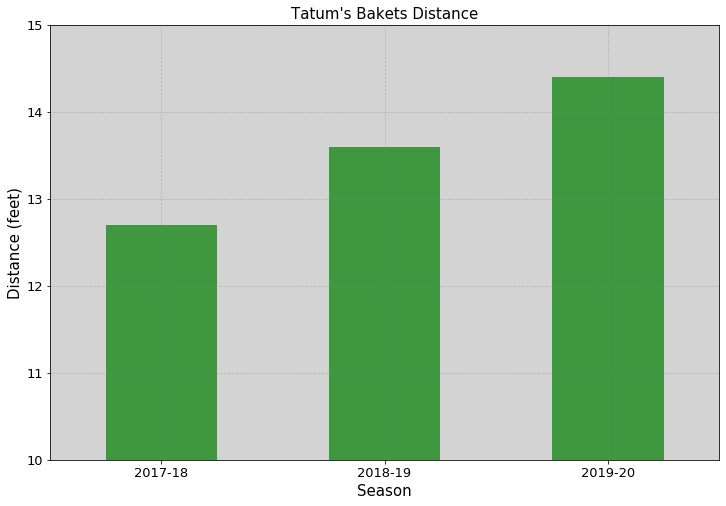

In [188]:
ax=df_shoot[df_shoot['REorPL']=='Regular Season']['Dist.'].plot(kind='bar',figsize=(12,8),color='green',alpha=0.7)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's Bakets Distance",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Distance (feet)',fontsize=15)
ax.set_ylim(10,15)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)